In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline


tracks = pd.read_csv('tracks.csv',header=None)
genres = pd.read_csv('genres.csv')
#features = pd.read_csv('features.csv')
echonest = pd.read_csv('echonest.csv',header=None)

C:\Users\qusac\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\qusac\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,11,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,1

In [2]:
header = tracks.iloc[1]
header[0]='track ID'
tracks.drop(tracks.index[[0,1,2]],inplace=True)
tracks.rename(columns = header,inplace=True)
tracks.head()

,track ID,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
3,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
4,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
6,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
7,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000,0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [3]:
header = echonest.iloc[2]
header[0]='track ID'
echonest.drop(echonest.index[[0,1,2,3]],inplace=True)
echonest.rename(columns = header,inplace=True)
#df1=echonest[['track ID','acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo','valence','artist_hotttnesss']]
echonest

,track ID,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,014,015,016,017,018,019,020,021,022,023,024,025,026,027,028,029,030,031,032,033,034,035,036,037,038,039,040,041,042,043,044,045,046,047,048,049,050,051,052,053,054,055,056,057,058,059,060,061,062,063,064,065,066,067,068,069,070,071,072,073,074,075,076,077,078,079,080,081,082,083,084,085,086,087,088,089,090,091,092,093,094,095,096,097,098,099,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223
4,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.8772332668,0.5889111161,0.3542430103,0.2950901389,0.2984125018,0.3094303906,0.3044959009,0.3345789909,0.2494945079,0.2596555948,0.3183763623,0.3719735742,1.0000000000,0.5709999800,0.2779999971,0.2099999934,0.2150000036,0.2285000086,0.2375000119,0.2790000141,0.1685000062,0.1685000062,0.2790000141,0.3324999809,0.0498478077,0.1042116806,0.0602296367,0.0522896349,0.0474028923,0.0528145321,0.0527327284,0.0622162186,0.0516130924,0.0573992468,0.0531989150,0.0625829771,0.0359999985,0.0179999992,0.0170000009,0.0209999997,0.0209999997,0.0099999998,0.0149999997,0.0410000011,0.0099999998,0.0089999996,0.0209999997,0.0130000003,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,0.9639999866,0.9819999933,0.9829999804,0.9789999723,0.9789999723,0.9900000095,0.9850000143,0.9589999914,0.9900000095,0.9909999967,0.9789999723,0.9869999886,-1.8993418217,-0.0326541141,0.8784691095,1.1475379467,0.9508557320,0.9482570291,1.1578869820,1.1479109526,1.6463184357,1.5301933289,1.1975679398,0.7456728220,2.5100378990,-1.5001832247,0.0305399895,0.6942420006,0.1704316139,0.0646948814,0.8747265339,0.7225761414,2.2513198853,1.7081594467,1.0548572540,0.0206749439,42.9491310120,44.3874359131,32.4093894958,15.6686668396,10.1140279770,-4.0692524910,2.0423531532,2.1883211136,-3.8059234619,-0.4946986735,6.0246696472,10.6925992966,44.4425010681,42.3885002136,31.6849994659,9.9875001907,9.5685005188,-7.1484999657,3.8315000534,1.8505001068,-2.6875000000,-0.7999999523,5.4615001678,10.2565002441,39.4948196411,1966.9791259766,1825.1230468750,1903.7567138672,828.8100585938,911.1558227539,581.0153198242,722.0014038086,404.6825561523,315.5284729004,376.6324157715,229.2825469971,0.0000000000,-110.3679962158,-100.6050033569,-112.5810012817,-75.8820037842,-89.1600036621,-80.7379989624,-91.4980010986,-66.6490020752,-61.8450012207,-66.0810012817,-58.0439987183,52.0060005188,216.2369995117,208.4230041504,145.1940002441,97.4820022583,98.7229995728,68.0910034180,101.5889968872,69.5059967041,58.2270011902,69.2620010376,58.1759986877,52.0060005188,326.6049804688,309.0280151367,257.7749938965,173.3640136719,187.8829956055,148.8290100098,193.0870056152,136.1549987793,120.0720062256,135.3430023193,116.2200012207,-2.9521524906,0.0603787526,0.5259760022,0.3659146428,0.0181823578,0.4544309378,-0.3300074339,0.1493950188,-0.2148586661,0.0304272678,-0.1538770944,-0.1501315832

In [4]:
df = pd.merge(echonest, tracks, how='inner', on=['track ID'])
df

,track ID,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,014,015,016,017,018,019,020,021,022,023,024,025,026,027,028,029,030,031,032,033,034,035,036,037,038,039,040,041,042,043,044,045,046,047,048,049,050,051,052,053,054,055,056,057,058,059,060,061,062,063,064,065,066,067,068,069,070,071,072,073,074,075,076,077,078,079,080,081,082,083,084,085,086,087,088,089,090,091,092,093,094,095,096,097,098,099,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.8772332668,0.5889111161,0.3542430103,0.2950901389,0.2984125018,0.3094303906,0.3044959009,0.3345789909,0.2494945079,0.2596555948,0.3183763623,0.3719735742,1.0000000000,0.5709999800,0.2779999971,0.2099999934,0.2150000036,0.2285000086,0.2375000119,0.2790000141,0.1685000062,0.1685000062,0.2790000141,0.3324999809,0.0498478077,0.1042116806,0.0602296367,0.0522896349,0.0474028923,0.0528145321,0.0527327284,0.0622162186,0.0516130924,0.0573992468,0.0531989150,0.0625829771,0.0359999985,0.0179999992,0.0170000009,0.0209999997,0.0209999997,0.0099999998,0.0149999997,0.0410000011,0.0099999998,0.0089999996,0.0209999997,0.0130000003,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,0.9639999866,0.9819999933,0.9829999804,0.9789999723,0.9789999723,0.9900000095,0.9850000143,0.9589999914,0.9900000095,0.9909999967,0.9789999723,0.9869999886,-1.8993418217,-0.0326541141,0.8784691095,1.1475379467,0.9508557320,0.9482570291,1.1578869820,1.1479109526,1.6463184357,1.5301933289,1.1975679398,0.7456728220,2.5100378990,-1.5001832247,0.0305399895,0.6942420006,0.1704316139,0.0646948814,0.8747265339,0.7225761414,2.2513198853,1.7081594467,1.0548572540,0.0206749439,42.9491310120,44.3874359131,32.4093894958,15.6686668396,10.1140279770,-4.0692524910,2.0423531532,2.1883211136,-3.8059234619,-0.4946986735,6.0246696472,10.6925992966,44.4425010681,42.3885002136,31.6849994659,9.9875001907,9.5685005188,-7.1484999657,3.8315000534,1.8505001068,-2.6875000000,-0.7999999523,5.4615001678,10.2565002441,39.4948196411,1966.9791259766,1825.1230468750,1903.7567138672,828.8100585938,911.1558227539,581.0153198242,722.0014038086,404.6825561523,315.5284729004,376.6324157715,229.2825469971,0.0000000000,-110.3679962158,-100.6050033569,-112.5810012817,-75.8820037842,-89.1600036621,-80.7379989624,-91.4980010986,-66.6490020752,-61.8450012207,-66.0810012817,-58.0439987183,52.0060005188,216.2369

In [5]:
df['date_released'] = df['date_released'].str[:4]

In [6]:
count=df.groupby(['date_released']).size()

In [7]:
count.sort_values(ascending=False).head()

date_released
2010    1461
2009    1426
2011    1101
2008    1088
2007     464
dtype: int64

In [8]:
tracks_10=df.loc[df['date_released'].str[:4] == '2010']
tracks_09=df.loc[df['date_released'].str[:4] == '2009']

In [9]:
tracks_10.groupby(['genre_top']).size()


genre_top
Electronic       271
Folk              67
Hip-Hop          133
Instrumental       1
International     12
Jazz              23
Pop               58
Rock             372
dtype: int64

In [10]:
tracks_09.groupby(['genre_top']).size()

genre_top
Blues              8
Classical          5
Electronic       188
Folk             122
Hip-Hop          137
Instrumental      22
International     48
Jazz              31
Pop               12
Rock             553
dtype: int64

In [12]:
Hiphop_10=tracks_10.loc[tracks_10['genre_top'] == 'Hip-Hop']
Rock_09=tracks_09.loc[tracks_09['genre_top'] == 'Rock']
Elec_10=tracks_10.loc[tracks_10['genre_top'] == 'Electronic']

In [17]:
import numpy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
te=Rock_09.dropna(axis=1,how='any')
y = numpy.array(te[['listens']].values)[:,1]
X=(te[['duration','acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo','valence','artist_discovery','artist_familiarity','artist_hotttnesss','bit_rate']].values)


# Standardize features and Lasso regression
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#y_scaled = scaler.fit_transform(y.reshape(-1,1))


min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y.reshape(-1, 1))

C:\Users\qusac\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X_scaled, y_scaled = make_regression(n_features=13, n_targets=5,random_state=7, shuffle=True)

regr = RandomForestRegressor(random_state=7)
regr.fit(X_scaled, y_scaled )
RandomForestRegressor(bootstrap=True, criterion='mse',max_features=5)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [19]:
#type(regr.feature_importances_)
x=pd.DataFrame(regr.feature_importances_,index=['duration','acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo','valence','artist_discovery','artist_familiarity','artist_hotttnesss','bit_rate'])
x

,0
duration,0.329176
acousticness,0.022865
danceability,0.017129
energy,0.071556
instrumentalness,0.015817
liveness,0.032698
speechiness,0.061310
tempo,0.043553
valence,0.105322
artist_discovery,0.092840


In [32]:
X1=(te[['duration' ,'energy','speechiness','valence','artist_discovery','artist_familiarity','bit_rate']].values)
min_max_scaler = preprocessing.MinMaxScaler()
X1_scaled = min_max_scaler.fit_transform(X1)
y_scaled = min_max_scaler.fit_transform(y.reshape(-1, 1))

C:\Users\qusac\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1_scaled, y_scaled, test_size=0.2, random_state=7)
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X1_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % numpy.mean((regr.predict(X1_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X1_test, y_test))

Coefficients: 
 [[ 0.06639244  0.02389502 -0.04634556  0.00137827 -0.07491497  0.1819968
  -0.02251917]]
Residual sum of squares: 0.01
Variance score: 0.10


In [38]:
from sklearn.linear_model import Ridge
# Create linear regression object
regr = Ridge(alpha=10000)

# Train the model using the training sets
regr.fit(X1_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % numpy.mean((regr.predict(X1_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X1_test, y_test))


Coefficients: 
 [[ 5.77743690e-06  2.49013629e-05 -1.92717764e-05  3.65577949e-05
   1.19492458e-04  1.98710710e-04 -2.71368180e-05]]
Residual sum of squares: 0.01
Variance score: -0.00


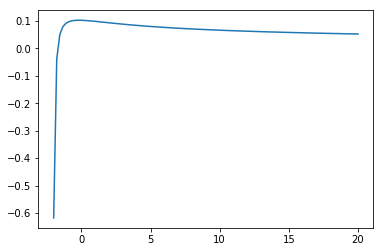

In [52]:
# Create linear regression object
alphas = numpy.linspace(-2,20,100)

scores = []

for alpha in alphas:
    regr = Ridge(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X1_train, y_train)
    scores.append(regr.score(X1_test,y_test))
plt.plot(alphas,scores)
  

C:\Users\qusac\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
C:\Users\qusac\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\qusac\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


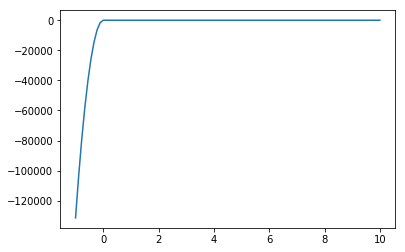

In [59]:
# Create linear regression object
alphas = numpy.linspace(-1,10,100)
from sklearn.linear_model import Lasso
scores = []

for alpha in alphas:
    regr = Lasso(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X1_train, y_train)
    scores.append(regr.score(X1_test,y_test))
plt.plot(alphas,scores)


# Cross validation with reguarlization

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
best_alpha = numpy.argmax(scores)

In [62]:
alphas[best_alpha]

0.0

,duration,energy,speechiness,valence,artist_discovery,artist_familiarity,bit_rate
15,756,0.9121220855,0.0875269884,0.0343252564,0.2627167688,0.1733150000,192000
18,80,0.2134937338,0.0640938189,0.1505991359,0.2756719299,0.1626220000,320000
19,206,0.8927211866,0.1022936576,0.0349164186,0.2756719299,0.1626220000,192000
23,160,0.7791404870,0.0772271448,0.0281438157,0.2756719299,0.1626220000,320000
25,259,0.4130542364,0.0408925050,0.2528193440,0.2756719299,0.1626220000,192000
